# german credit dataset
- 신용 평가 모댈
- 대출 신청자 1000명의 샘플데이터 => 실제 대출 승인여부 (good, bad)
It is worse to class a customer as good when they are bad, 
than it is to class a customer as bad when they are good.

분석의 목적:
- 고객 데이터를 기반으로 => 이사람의 대출 승인 여부를 판단하는 로직(기준)을 알려달라.

종속변수(우리가 알고 싶은 결과)
-risk(good, bad)


가설: 
=> 각각의 컬럼들이 -> Risk에 미치는 영향을 파악하면 -> 피처 엔지니어링에 활용 -> 모델링에 활용

EDA : 데이터를 보면서 종속 변수에 영향을 미치는 중요한 컬럼들을 발견하기 위해

(1) 저축계좌(적금계좌) / 예금계좌가 없거나 적은 사람은 신용에 문제가 있을 가능성이 높다.
(2) 대출목적 (TV) 신용에 문제가 있을 것이다.


In [63]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn


In [64]:
df=pd.read_csv("./german_credit_data.csv")
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


- Age: 나이 
- Sex: 성별
- Job: 직업
- Housing: 거주 형태(자가, 임대, 무상거주)
- Saving accounts: 저축 계좌 잔고
- Checking account: 입출금 계좌 잔고
- Credit amount: 대출 금액
- Duration: 대출 기간
- Purpose: 대출 목적
- Risk: 대출 위험도(상환 불이행 가능성)
- 
- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
- Risk (Value target - Good or Bad Risk)


In [65]:
# unnamed :0 컬럼 제거 
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [67]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [68]:
df.corr(numeric_only=True) #상관관계

#공정 데이터 분석을 하는 분이 계십니다. 
#제품의 영향을 주는 요소 컬럼이 100개가 넘어요 (소음 크기(데시벨))

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


In [69]:
#분석해야할 문제를 코드로 쓰는것 알겠는데 
# 무언가를 분석해야한다니 손도 대지 못했습니다. 
#-> 분석의 목적을 정하지 않아서가 아닐까
#걱정되네요

#목적과 목표는 회사에서 제시를 해준다
#나는 각을 재면 되요-> 제안받은목표를 달성할수 있겠다. 없겠다. 

# Eda[데이터 훑어보기  ]-> 찍먹
# 일을 하게되면 손 못대는 것보다 결과에 데이터를 껴맞추는게 더 많을거 같은.. => 정치싸움과 연결이...;;;


In [70]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [71]:
# 질문 1) null 값이 존재할 경우 이를 전처리 하지 않고 
#그냥 포함한 상태로 원시데이터를 여러시각적 분석을 하는것이 
# 전천리르 하고 시각화 하는 것보다 유의미한 분석방향인지가 궁금해졌습니다.

#=>> 당연히 전처리를 해야죠
#데이터가 많아서 제거하기가 조금 힘들것 같아
#null이 주는 의미는 없다. 피처엔지니어링 , 모델링
#null 처리를 하긴 해야해
#커뮤니 케이션 상태가 

In [72]:
#컬럼에서의 유니크한 값들
df.unique() #각 커럶의 유니크한 갯루를 반환 
df

AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
def unique_value(data,column):
    return data[column].nunique()


print(unique_value(df, list(df.columns)))

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [ ]:
def unique_value(data, column):
    return data[column].nunique()

print(unique_value(df, list(df.columns)))
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightgreen", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(df)


Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


,Missing Values,% Value
Checking account,394,39
Saving accounts,183,18
Age,0,0
Sex,0,0
Job,0,0
Housing,0,0
Credit amount,0,0
Duration,0,0
Purpose,0,0
Risk,0,0


In [ ]:
df.isna().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
df["Checking account"].value_counts(dropna=False)


Checking account
NaN         394
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [ ]:
df.groupby(['Sex','Checking account']).size().unstack()  #unstack: index값을 칼럼으로 

Checking account,little,moderate,rich
Sex,,,
female,88,86,20
male,186,183,43


In [ ]:
df.groupby(['Sex','Checking account']).size()

Sex     Checking account
female  little               88
        moderate             86
        rich                 20
male    little              186
        moderate            183
        rich                 43
dtype: int64

C:\Users\jung\AppData\Local\Temp\ipykernel_19736\4236329031.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[category[i]], ax=ax[i][0], kde=False)
C:\Users\jung\AppData\Local\Temp\ipykernel_19736\4236329031.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[category[i]], ax=ax[i][1], shade=True)
C:\Users\jung\AppData\Local\Temp\ipykernel_19736\4236329031.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-le

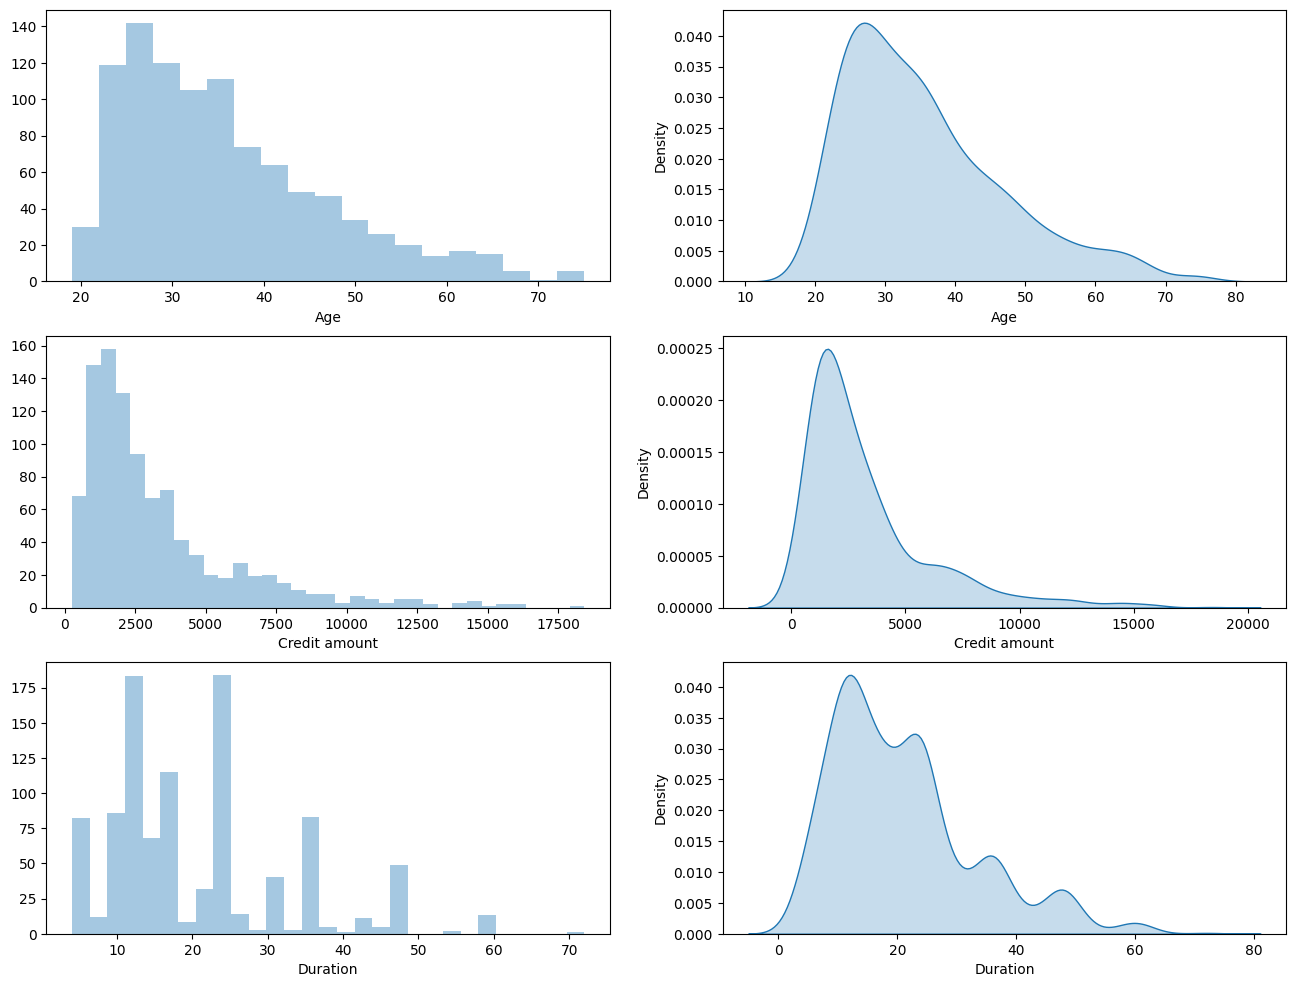

In [ ]:
fig, ax =plt.subplots(nrows=3,ncols=2, figsize=(16,12))
category=['Age','Credit amount','Duration']

count=0
for i in range(3):
    sns.distplot(df[category[i]], ax=ax[i][0], kde=False)
    sns.kdeplot(df[category[i]], ax=ax[i][1], shade=True)
    count+=1

In [ ]:
new_df = df[['Duration', 'Credit amount', 'Age']]
new_df.corr()

,Duration,Credit amount,Age
Duration,1.000000,0.624984,-0.036136
Credit amount,0.624984,1.000000,0.032716
Age,-0.036136,0.032716,1.000000


<Axes: >

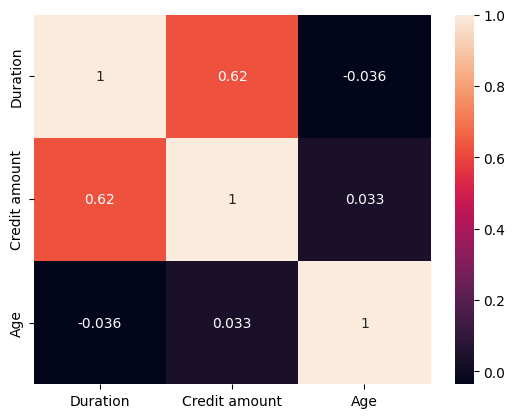

In [ ]:
sns.heatmap(new_df.corr(), annot=True)


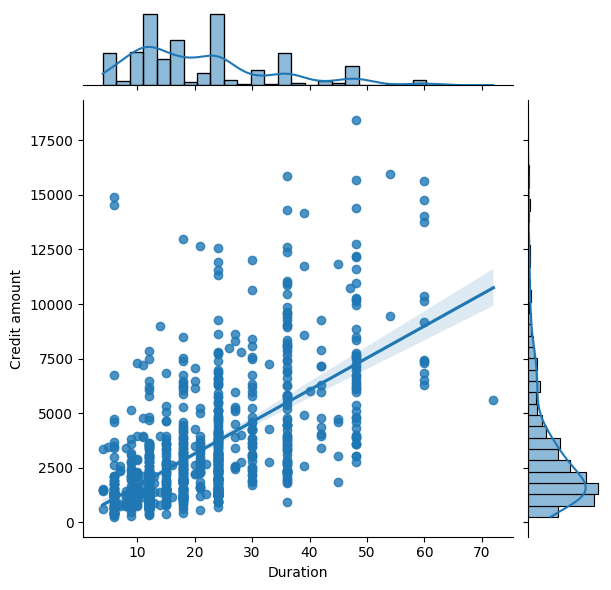

In [ ]:
sns.jointplot(x='Duration', y='Credit amount', data=new_df, kind='reg')


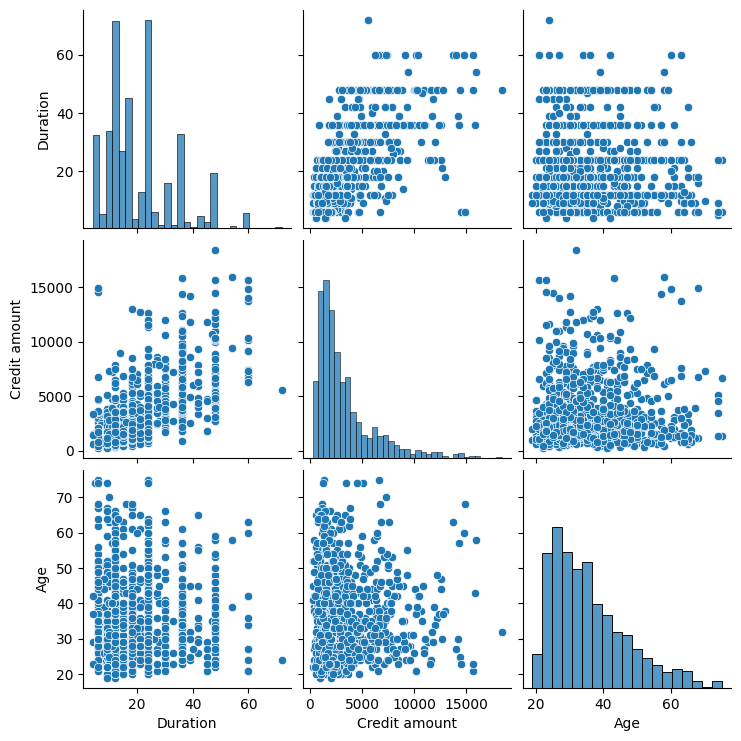

In [ ]:
sns.pairplot(new_df)

In [ ]:
!pip install plotly

In [ ]:
pip install --upgrade pip


     ---------------------------------------- 2.1/2.1 MB 7.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


In [ ]:
pip install --upgrade nbformat


  Using cached nbformat-5.8.0-py3-none-any.whl (77 kB)
  Using cached fastjsonschema-2.16.3-py3-none-any.whl (23 kB)
  Using cached jsonschema-4.17.3-py3-none-any.whl (90 kB)
                                              0.0/62.7 kB ? eta -:--:--
     ---------------------------------------- 62.7/62.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
!pip install nbformat

In [73]:
import plotly.offline as py 
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = df[df["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df[df["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
df_good = df.loc[df["Risk"] == 'good']['Age'].values.tolist()
df_bad = df.loc[df["Risk"] == 'bad']['Age'].values.tolist()
df_age = df['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.1)
py.iplot(fig)


NameError: name 'go' is not defined

# feture engineering